In [99]:
import torch 
import matplotlib.pyplot as plt
from run_model import get_dataloader
from utils import get_all_amino_acids, get_wild_type_amino_acid_sequence, count_substring_mismatch
from rnn import GenerativeRNN
from hmm import GenerativeHMM
from vae import GenerativeVAE
import numpy as np
import time
import pandas as pd
from scipy.stats import skewnorm
from utils import hmm_default_args, vae_default_args, rnn_default_args
from utils import hmm_default_small_args, vae_default_small_args, rnn_default_small_args
from utils import translate, load_data
from sklearn.model_selection import train_test_split


## RNN 

In [2]:
args = rnn_default_args()
args["num_data"] = 1000
args["dataset"] = "gfp_amino_acid"

In [3]:
rnn = GenerativeRNN(args)

In [9]:
# test load 
rnn.load_model("./models/rnn_test_sample_1/checkpoint_50.pt", initial_probs=True)

In [10]:
train_loader, valid_loader, test_loader = get_dataloader(args)

In [11]:
score = rnn.evaluate(test_loader)
print(score)
assert(score < 26)

25.79530859375


In [12]:
# test sample
samples = rnn.sample(1000, 238)

In [13]:
wild_type = get_wild_type_amino_acid_sequence()
mismatches = [count_substring_mismatch(sample, wild_type) for sample in samples]
print(mismatches)

[6, 3, 1, 1, 4, 4, 2, 3, 232, 4, 2, 2, 3, 3, 4, 2, 6, 4, 1, 4, 5, 1, 3, 5, 2, 4, 4, 2, 6, 3, 75, 7, 5, 3, 8, 4, 215, 4, 1, 5, 7, 187, 2, 6, 1, 219, 6, 7, 1, 219, 7, 7, 8, 4, 6, 5, 7, 3, 3, 4, 4, 4, 5, 2, 6, 4, 4, 3, 2, 5, 4, 7, 2, 0, 3, 3, 1, 214, 2, 2, 4, 3, 2, 74, 4, 8, 1, 5, 8, 10, 110, 5, 142, 193, 4, 6, 0, 3, 5, 0, 5, 4, 3, 10, 4, 4, 5, 3, 1, 175, 5, 6, 34, 5, 5, 5, 5, 8, 4, 219, 3, 63, 8, 1, 1, 3, 3, 2, 3, 40, 3, 3, 7, 77, 7, 0, 7, 3, 213, 3, 4, 6, 5, 56, 4, 1, 5, 4, 1, 1, 212, 223, 4, 4, 2, 4, 1, 3, 5, 7, 2, 94, 7, 5, 2, 4, 4, 4, 0, 2, 0, 5, 2, 2, 4, 3, 4, 1, 3, 7, 94, 3, 3, 172, 4, 3, 3, 75, 3, 7, 3, 3, 6, 5, 2, 2, 4, 2, 2, 3, 6, 3, 5, 94, 3, 5, 2, 38, 1, 1, 3, 2, 3, 5, 3, 2, 3, 1, 4, 142, 5, 4, 4, 4, 2, 2, 3, 7, 5, 227, 3, 5, 4, 4, 4, 7, 7, 4, 2, 6, 4, 5, 222, 7, 227, 2, 2, 3, 7, 3, 3, 5, 3, 218, 8, 3, 1, 4, 7, 4, 145, 4, 132, 2, 5, 3, 6, 7, 4, 2, 110, 3, 5, 0, 0, 8, 4, 3, 5, 2, 5, 4, 2, 1, 2, 0, 230, 4, 4, 178, 5, 2, 8, 1, 7, 43, 2, 3, 2, 1, 6, 1, 3, 7, 4, 6, 3, 3, 3, 1, 5, 3

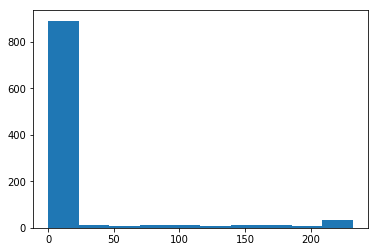

In [14]:
plt.hist(mismatches)
plt.show()

In [15]:
mismatches_20, mismatches_1000 = [sample for sample in samples if count_substring_mismatch(sample, wild_type) < 20], [sample for sample in samples if count_substring_mismatch(sample, wild_type) >= 20]

In [16]:
len(mismatches_20), len(mismatches_1000)

(886, 114)

In [21]:
mismatches_20_lst = [count_substring_mismatch(sample, wild_type) for sample in mismatches_20]

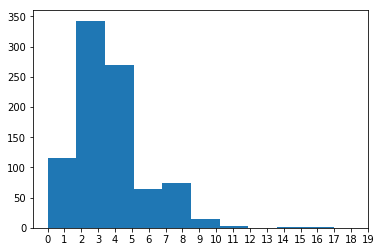

In [24]:
plt.figure()
plt.hist(mismatches_20_lst)
plt.xticks(range(0, 20, 1))
plt.show()

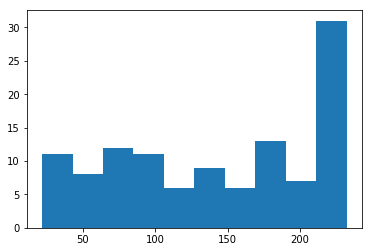

In [27]:
mismatches_1000_lst = [count_substring_mismatch(sample, wild_type) for sample in mismatches_1000]
plt.figure()
plt.hist(mismatches_1000_lst)
plt.show()

In [28]:
print(mismatches_1000[0:10])

['EWISTQGELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKPHDFFKSAMPEGYVQERTIFSKDDGNYKTRAEVKFEGDTLVNRIELKGVDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHTLSIQSALSKDPNEKRDHMVLLEFVTAAGITHGMDEL', 'SKGEALFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTILFKVDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYIYNSHNVYIMADKQKNGIKVNKFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMGELYK', 'SRGEECKTWVVTALVECDGNYKTRGEVKIEDGNVLGHKLVYNYNSHNVYIMADKLKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHLVLLEFVTAAGVTHGMDEQYK*I*I*NAKGRKLEYNYICNTNGKKVNPKILGGNVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK*FKTDI', 'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGEPFLVKISKSGLVELDYVNHTLSEYSVSGEGDTYGRLTLKFVCTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYRTRTEVKFEGDTLVNRIELRGIDFKEDGDILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQ', 'YIMGELYKSISSKGEELSTGVVPILVELDG

In [35]:
wild_type

'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK*'

In [36]:
mismatches_1000[7]

'SKGEELFTGVVPILVELDGDVNGRKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTPVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQRNGIKVNLKINNNIKNVKSEEGGIVAGHKLEYNYNSHNVYIMADKRKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPV'

In [54]:
sub = 'KLEYNYNSHNVYIMADK' #VYIMADKRKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPV
print(wild_type.index(sub))
k = mismatches_1000[7].index(sub)
print(k)
print(k+mismatches_1000[7][k+1:].index(sub))

138
138
183


In [ ]:
# auto regressive models may mess up really bad and start recovering one part of the sequence in the middle of another part of a sequence 

## Generating Random Sequences

In [123]:
def generate_mutations_df(base_sequence, mutations_lst, mutation_count_lst, alphabet, 
                          start_mutation_index=0, end_mutation_index=0, verbose=False):
    """
    Generates a mutated dataframe
    :param base_sequence: string, the sequence to be mutated
    :param mutations_lst: list, the number of mutations from the base sequence
    :param mutation_count_lst: list, defines the number of each mutation count to generate
    :param alphabet: string, the entire set of letters in the vocabulary
    :param start_mutation_index: int, how many characters to skip at the beginning of the mutation
    :param end_mutation_index: int, how many characters to skip at the end of the mutation
    :return: a dataframe comprised of three columns: the mutated strings, the number of mutations, the base_sequence
    >>> mutations_lst, base_sequence = [1, 2, 3], get_wild_type_amino_acid_sequence()
    >>> alphabet, num_per_mutation_count = get_all_amino_acids(), 100
    >>> mutated_df = generate_mutations_df(mutations_lst, base_sequence, alphabet, num_per_mutation_count, verbose=False)
    >>> for i, row in mutated_df.iterrows():
    ...     assert(count_substring_mismatch(row["mutated_string"], row["base_sequence"]) == row["mutation_count"])
    """
    start_time = time.time()
    # get index maps
    characters_to_index = dict(zip(alphabet, range(len(alphabet))))
    index_to_characters = dict(zip(range(len(alphabet)), alphabet))
    num_characters = len(alphabet)
    total_data_points = sum(mutation_count_lst)        
    mutations_per_sequence_lst = np.array([[mutation_count for _ in range(num_mutations)] 
                                for mutation_count, num_mutations in zip(mutations_lst, mutation_count_lst)]).flatten()
    assert(total_data_points < 200000)
    assert(len(mutations_lst) == len(mutation_count_lst))
    assert(len(mutations_per_sequence_lst) == total_data_points)
    mutated_strings_lst = []
    for i, mutation_count in enumerate(mutations_per_sequence_lst):
        mutated_string = get_mutation(string=base_sequence,
                                      num_mutations=mutation_count,
                                      num_characters=num_characters,
                                      characters_to_index=characters_to_index,
                                      index_to_characters=index_to_characters,
                                      start_mutation_index=start_mutation_index,
                                      end_mutation_index=end_mutation_index)
        mutated_strings_lst.append(mutated_string)
        if i % 1000 == 0 and verbose:
            print(
                "Generated {0}/{1} mutations in {2:.2f} seconds".format(i, total_data_points, time.time() - start_time))
    base_sequences_lst = [base_sequence] * total_data_points
    mutated_df = pd.DataFrame.from_dict({
        'mutated_string': mutated_strings_lst,
        'mutation_count': mutations_per_sequence_lst,
        'base_sequence': base_sequences_lst
    })
    if verbose:
        print("{0:.2f} seconds to generate the mutated df".format(time.time() - start_time))
    return mutated_df

def get_mutation(string, num_mutations, num_characters, characters_to_index, index_to_characters,
                 start_mutation_index=0, end_mutation_index=0):
    """
    get a mutation of a string
    :param string: the string to be mutated
    :param num_mutations: the number of mutations
    :param num_characters: the number of characters in alphabet
    :param characters_to_index: map from characters in alphabet to index
    :param index_to_characters: map from index in alphabet to characters
    :param start_mutation_index: how many characters to skip at the beginning of the mutation
    :param end_mutation_index: how many characters to skip at the end of the mutation
    :return: mutated string
    >>> get_mutation("AAC", num_mutations=1, num_characters=2, characters_to_index={"A": 0, "C": 1}, \
        index_to_characters={0: "A", 1: "C"}, start_mutation_index=1, end_mutation_index=1)
    'ACC'
    >>> np.random.seed(1)
    >>> get_mutation("ACTGA", num_mutations=2, num_characters=4, characters_to_index={"A": 0, "C": 1, "T": 2, "G": 3}, \
        index_to_characters={0: "A", 1: "C", 2: "T", 3: "G"}, start_mutation_index=1, end_mutation_index=1)
    'ATTAA'
    """
    mutation = list(string)
    indexes = np.random.choice(range(start_mutation_index, len(string) - end_mutation_index),
                            num_mutations, replace=False)
    for i in indexes:
        original_c = string[i]
        original_index = characters_to_index[original_c]
        # mutation by moving the character somewhere else along the possible sequences.
        new_index = (original_index + np.random.randint(1, num_characters)) % num_characters
        mutation[i] = index_to_characters[new_index]
    return "".join(mutation)

In [113]:
alphabet = get_all_amino_acids()
characters_to_index = dict(zip(alphabet, range(len(alphabet))))
index_to_characters = dict(zip(range(len(alphabet)), alphabet))

In [114]:
wild_type = get_wild_type_amino_acid_sequence()
s=get_mutation(wild_type, 238, len(alphabet), characters_to_index, index_to_characters, 0, 0)

In [115]:
print("Mismatches:", count_substring_mismatch(s, wild_type))
print(s)

Mismatches: 238
AFRLANQFAAAITPLFPI*LWKEVRPFGCLWKD*GQNSAMNPGHNEIQWAVKGNLADNIFRVGPVRMPESQMVNKVGGRSRGPHQDAGNPECWSYFP*YYFP*SRWFDG*CNRRKHKIQRQWVVASD*MFSVTAAMKMFGTC*VRK*CPIWDDLYFMWFWFDMVT**KFNACMFDSQPVTWLHKQDSHITQYTMCWARSKGWRFGRETTKQSHEMEYEPSFHTLMIKACVVN*DPWPK


In [124]:
mutations_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mutations_count = [100] * 10
base_sequence = wild_type
alphabet = get_all_amino_acids() 
num_per_mutation_count = 1000
start_mutation_index = 5
end_mutation_index = 5
mutated_df = generate_mutations_df(base_sequence, mutations_lst, mutations_count, alphabet, start_mutation_index, end_mutation_index, verbose=True)

Generated 0/1000 mutations in 0.00 seconds
0.13 seconds to generate the mutated df


In [127]:
for i, row in mutated_df.iterrows():
    assert(count_substring_mismatch(row["mutated_string"], row["base_sequence"]) == row["mutation_count"])
    assert(count_substring_mismatch(row["mutated_string"][:start_mutation_index], row["base_sequence"][:start_mutation_index]) == 0)
    assert(count_substring_mismatch(row["mutated_string"][-end_mutation_index:], row["base_sequence"][-end_mutation_index:]) == 0)

In [126]:
print(mutated_df.shape)

(1000, 3)


In [129]:
from sklearn.model_selection import train_test_split

mutations_lst = range(10)
mutations_count = [1000] * 10
name = "synthetic_data_length_20_uniform"
base_sequence = "GYSSASKIIFGSGTRLSIRP"
alphabet = get_all_amino_acids()
start_mutation_index = 1
end_mutation_index = 1
mutated_df = generate_mutations_df(base_sequence, mutations_lst, mutations_count, alphabet,
                                   start_mutation_index, end_mutation_index, verbose=True)
mutated_df = mutated_df.sample(frac=1).reset_index(drop=True)
mutated_df.to_csv(name + ".csv")
x_train, x_test = train_test_split(mutated_df, test_size = 0.5)

Generated 0/10000 mutations in 0.00 seconds
Generated 1000/10000 mutations in 0.08 seconds
Generated 2000/10000 mutations in 0.14 seconds
Generated 3000/10000 mutations in 0.20 seconds
Generated 4000/10000 mutations in 0.26 seconds
Generated 5000/10000 mutations in 0.33 seconds
Generated 6000/10000 mutations in 0.39 seconds
Generated 7000/10000 mutations in 0.45 seconds
Generated 8000/10000 mutations in 0.54 seconds
Generated 9000/10000 mutations in 0.62 seconds
0.69 seconds to generate the mutated df


In [132]:
np.save(name + "_x_train.npy", x_train)
np.save(name + "_x_test.npy", x_test)

## Discrete Gaussian Distributions

In [262]:
def generate_discrete_gaussian_distribution(num_values, mean=5.5, std=2, low=1, high=10):
    """
    generates a discrete gaussian distribution
    :param num_values: int, number of samples to take from discrete distribution
    :param mean: float, mean of gaussian
    :param std: float, standard deviation of gaussian
    :param low: int, lowest value the discrete distribution will have
    :param high: int, highest value the discrete distribution will have
    :return: gaussian_lst, list, list of values in distributions
            bins, dict, map between the values and counts in distribution
    >>> np.random.seed(1)
    >>> generate_discrete_gaussian_distribution(10, 0, 1, -4, 4)[0]
    [2.0, -1.0, -1.0, -1.0, 1.0, -2.0, 2.0, -1.0, 0.0, -0.0]
    >>> generate_discrete_gaussian_distribution(10, 0, 1, -4, 4)[1]
    {-4: 0.0, -3: 0.0, -2: 1.0, -1: 2.0, 0: 4.0, 1: 3.0, 2: 0.0, 3: 0.0, 4: 0.0}
    """
    normal_lst = np.random.normal(loc=mean, scale=std, size=num_values)
    bins = dict(zip(list(range(low, high + 1)), np.zeros(high - low + 1)))
    gaussian_lst = []
    for x in normal_lst:
        if x <= low:
            gaussian_lst.append(low)
            bins[low] += 1
        elif x >= high:
            gaussian_lst.append(high)
            bins[high] += 1
        else:
            gaussian_lst.append(round(x))
            bins[round(x)] += 1
    return gaussian_lst, bins

{1: 246.0, 2: 426.0, 3: 848.0, 4: 1465.0, 5: 1973.0, 6: 1935.0, 7: 1537.0, 8: 888.0, 9: 453.0, 10: 229.0}


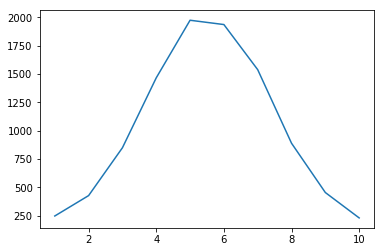

In [266]:
hist = generate_discrete_gaussian_distribution(10000, 5.5, 2, 1, 10)[1]
print(hist)
plt.plot(hist.keys(), hist.values())

In [270]:
def generate_discrete_skewed_gaussian_distribution(num_values, a=4, mean=5.5, std=2, low=1, high=10):
    """
    generates a discrete skewed gaussian distribution
    :param num_values: int, number of samples to take from discrete distribution
    :param a: float, skew of the distribution, positive is right leaning, negative is left learning
    :param mean: float, mean of gaussian
    :param std: int, standard deviation of gaussian
    :param low: int, lowest value the discrete distribution will have
    :param high: int, highest value the discrete distribution will have
    :return: skewed_gaussian_lst, list, list of values in distributions
            bins, dict, map between the values and counts in distribution
    >>> np.random.seed(1)
    >>> generate_discrete_skewed_gaussian_distribution(num_values=10, a=4, mean=0, std=1, low=-4, high=4)[0]
    [2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0]
    >>> generate_discrete_skewed_gaussian_distribution(num_values=10, a=4, mean=0, std=1, low=-4, high=4)[1]
    {-4: 0.0, -3: 0.0, -2: 0.0, -1: 0.0, 0: 3.0, 1: 7.0, 2: 0.0, 3: 0.0, 4: 0.0}
    """
    skewed_lst = skewnorm(a=a, loc=mean, scale=std).rvs(num_values)
    bins = dict(zip(list(range(low, high + 1)), np.zeros(high - low + 1)))
    skewed_gaussian_lst = []
    for x in skewed_lst:
        if x <= low:
            skewed_gaussian_lst.append(low)
            bins[low] += 1
        elif x >= high:
            skewed_gaussian_lst.append(high)
            bins[high] += 1
        else:
            skewed_gaussian_lst.append(round(x))
            bins[round(x)] += 1
    return skewed_gaussian_lst, bins

{1: 5.0, 2: 342.0, 3: 2028.0, 4: 3065.0, 5: 2418.0, 6: 1366.0, 7: 545.0, 8: 181.0, 9: 39.0, 10: 11.0}


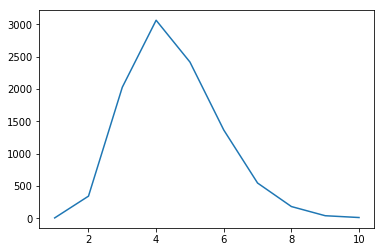

In [271]:
hist = generate_discrete_skewed_gaussian_distribution(10000, 3, 3, 2, 1, 10)[1]
print(hist)
plt.plot(hist.keys(), hist.values())

In [294]:
def generate_discrete_uniform_distribution(num_values, low=1, high=10):
    """
    generates a discrete uniform distribution
    :param num_values: int, number of samples to take from discrete distribution
    :param low: int, lowest value the discrete distribution will have
    :param high: int, highest value the discrete distribution will have
    :return: uniform_lst, list, list of values in distribution
            bins, dict, map between the values and counts in distribution
    >>> generate_discrete_uniform_distribution(num_values=10, low=1, high=10)[0]
    [2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0]
    >>> generate_discrete_uniform_distribution(num_values=10, low=1, high=10)[1]
    {-4: 0.0, -3: 0.0, -2: 0.0, -1: 0.0, 0: 3.0, 1: 7.0, 2: 0.0, 3: 0.0, 4: 0.0}
    """
    uniform_lst = np.random.choice(range(low, high + 1), num_values, replace=True)
    bins = dict(zip(list(range(low, high + 1)), np.zeros(high - low + 1)))
    for x in uniform_lst: 
        bins[x] += 1
    return uniform_lst, bins

{1: 1033.0, 2: 1006.0, 3: 988.0, 4: 1015.0, 5: 1008.0, 6: 955.0, 7: 970.0, 8: 1032.0, 9: 984.0, 10: 1009.0}


([<matplotlib.axis.YTick at 0x111a1c438>,
 <a list of 10 Text yticklabel objects>)

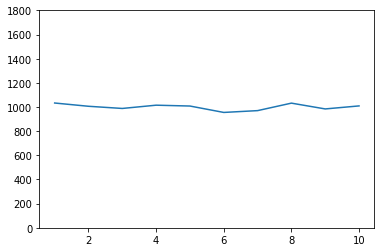

In [303]:
hist = generate_discrete_uniform_distribution(10000, 1, 10)[1]
print(hist)
plt.plot(hist.keys(), hist.values())
plt.yticks(list(range(0, 2000, 200)))

In [286]:
np.digitize([1, 2, 2, 2, 1, 2, 3, 4, 5], bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

array([1, 2, 2, 2, 1, 2, 3, 4, 5])

## Script Commands

In [3]:
for mp in [hmm_default_args(), rnn_default_args(), vae_default_args()]:
    command = "python3 run_experiment.py "
    for key, value in mp.items():
        command += "--{0} {1} ".format(key, value)
    print(command)

python3 run_experiment.py --model_type hmm --base_log logs/gfp/hmm/ --name hmm_default_medium --input 4998 --hidden_size 100 --latent_dim -1 --seq_length 238 --pseudo_count 1 --n_jobs 1 --device cpu --learning_rate 0.001 --epochs 100 --batch_size 10 --layers 1 --dataset gfp --num_data 1000 
python3 run_experiment.py --model_type rnn --base_log logs/gfp/rnn/ --name rnn_default_medium --input 4998 --hidden_size 200 --latent_dim -1 --seq_length 238 --pseudo_count 1 --n_jobs 1 --device cpu --learning_rate 0.001 --epochs 100 --batch_size 10 --layers 1 --dataset gfp --num_data 1000 
python3 run_experiment.py --model_type vae --base_log logs/gfp/vae/ --name vae_default_medium --input 4998 --hidden_size 200 --latent_dim 20 --seq_length 238 --pseudo_count 1 --n_jobs 1 --device cpu --learning_rate 0.001 --epochs 100 --batch_size 10 --layers 1 --dataset gfp --num_data 1000 


In [5]:
for mp in [hmm_default_small_args(), rnn_default_small_args(), vae_default_small_args()]:
    command = "python3 run_experiment.py "
    for key, value in mp.items():
        command += "--{0} {1} ".format(key, value)
    print(command)

python3 run_experiment.py --model_type hmm --base_log logs/gfp/hmm/ --name hmm_default_small --input 4998 --hidden_size 30 --latent_dim -1 --seq_length 238 --pseudo_count 1 --n_jobs 1 --device cpu --learning_rate 0.001 --epochs 10 --batch_size 10 --layers 1 --dataset gfp --num_data 100 
python3 run_experiment.py --model_type rnn --base_log logs/gfp/rnn/ --name rnn_default_small --input 4998 --hidden_size 100 --latent_dim -1 --seq_length 238 --pseudo_count 1 --n_jobs 1 --device cpu --learning_rate 0.001 --epochs 10 --batch_size 10 --layers 1 --dataset gfp --num_data 100 
python3 run_experiment.py --model_type vae --base_log logs/gfp/vae/ --name vae_default_small --input 4998 --hidden_size 50 --latent_dim 20 --seq_length 238 --pseudo_count 1 --n_jobs 1 --device cpu --learning_rate 0.001 --epochs 10 --batch_size 10 --layers 1 --dataset gfp --num_data 100 


## Load Model Tests and Examples

In [6]:
args = hmm_default_small_args()
train, test, valid = get_dataloader(args)
hmm = GenerativeHMM(args)

In [7]:
hmm.load_model("./logs/gfp/hmm/hmm_default_small/hmm_default_small_saved_model")

In [8]:
hmm.evaluate(dataloader=train, verbose=True)
hmm.evaluate(dataloader=valid, verbose=True)
hmm.evaluate(dataloader=test, verbose=True)

Average neg log prob: 628.3210
Average neg log prob: 629.0156
Average neg log prob: 628.3280


62832.79716804136

In [9]:
args = rnn_default_small_args()
train, test, valid = get_dataloader(args)
rnn = GenerativeRNN(args)
rnn.load_model("./logs/gfp/rnn/rnn_default_small/rnn_default_small_saved_model", initial_probs=True)
rnn.evaluate(dataloader=train, verbose=True)
rnn.evaluate(dataloader=valid, verbose=True)
rnn.evaluate(dataloader=test, verbose=True)

total loss: 13899.3975
total loss: 14926.1650
total loss: 14291.8877


142.918876953125

In [10]:
args = vae_default_small_args()
train, test, valid = get_dataloader(args)
vae = GenerativeVAE(args)
vae.load_model("./logs/gfp/vae/vae_default_small/vae_default_small_saved_model", initial_probs=True)
vae.evaluate(dataloader=train, verbose=True)
vae.evaluate(dataloader=valid, verbose=True)
vae.evaluate(dataloader=test, verbose=True)

total loss: 42.3699 cross entropy loss: 22.5995. kld loss: 19.7704
total loss: 55.0566 cross entropy loss: 35.3196. kld loss: 19.7370
total loss: 50.7607 cross entropy loss: 30.9645. kld loss: 19.7962


(50.76067352294922, 30.964462280273438, 19.79621124267578)

In [11]:
args = vae_default_args()
train, test, valid = get_dataloader(args)
vae = GenerativeVAE(args)
vae.load_model("./logs/gfp/vae/vae_default_medium/vae_default_medium_saved_model")
vae.evaluate(dataloader=train, verbose=True)
vae.evaluate(dataloader=valid, verbose=True)
vae.evaluate(dataloader=test, verbose=True)
vae.load_model("./logs/gfp/vae/vae_default_medium/vae_checkpoint_50.pt")
vae.evaluate(dataloader=train, verbose=True)
vae.evaluate(dataloader=valid, verbose=True)
vae.evaluate(dataloader=test, verbose=True)
vae.load_model("./logs/gfp/vae/vae_default_medium/vae_checkpoint_100.pt")
vae.evaluate(dataloader=train, verbose=True)
vae.evaluate(dataloader=valid, verbose=True)
vae.evaluate(dataloader=test, verbose=True)

total loss: 16.5850 cross entropy loss: 8.7567. kld loss: 7.8283
total loss: 33.4577 cross entropy loss: 28.8167. kld loss: 4.6410
total loss: 33.0673 cross entropy loss: 28.4835. kld loss: 4.5838
total loss: 19.1523 cross entropy loss: 14.4726. kld loss: 4.6798
total loss: 28.4736 cross entropy loss: 25.9630. kld loss: 2.5106
total loss: 28.0769 cross entropy loss: 25.5769. kld loss: 2.5000
total loss: 16.5276 cross entropy loss: 8.6994. kld loss: 7.8283
total loss: 33.4454 cross entropy loss: 28.8045. kld loss: 4.6410
total loss: 33.2289 cross entropy loss: 28.6451. kld loss: 4.5838


(33.22893142700195, 28.64513397216797, 4.583797454833984)

## GFP Data checks

In [130]:
df = pd.read_csv("./data/gfp_data.csv")

In [137]:
wild_type = df["nucSequence"].values[0]
aa_wild_type = translate(df["nucSequence"].values[0])
assert(all([count_substring_mismatch(x1, wild_type) == x2 for x1, x2 in zip(df["nucSequence"].values, df["numNucMutations"])]
          ))

In [132]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)

In [133]:
df.columns

Index(['nucSequence', 'numNucMutations', 'numAAMutations', 'uniqueBarcodes',
       'medianBrightness', 'std', 'aaSequence'],
      dtype='object')

In [134]:
df["aaSequence"] = df["nucSequence"].apply(lambda x : translate(x))

In [135]:
print(len(wild_type)), print(len(aa_wild_type)), print(len(df["aaSequence"][0]))

714
238
238


(None, None, None)

In [138]:
for x1, x2 in zip(df["aaSequence"].values, df["numAAMutations"].values):
    assert(count_substring_mismatch(x1, aa_wild_type) == x2)
    assert("*" in x1)

In [141]:
df = df.sample(frac=1).reset_index(drop=True)
df["aaSequence"] = df["aaSequence"].apply(lambda x : x.upper())
train_size = int(df.shape[0] * 0.8)
train_df = df[:train_size].reset_index(drop=True)
assert(wild_type in train_df["nucSequence"].values)
test_df = df[train_size: ].reset_index(drop=True)
print(train_df.shape, test_df.shape)

(46733, 7) (11684, 7)


In [142]:
df.head(10), df.shape, train_df.head(10), train_df.shape, test_df.head(10), test_df.shape

(                                         nucSequence  numNucMutations  \
 0  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                6   
 1  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                2   
 2  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                1   
 3  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                3   
 4  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                2   
 5  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                6   
 6  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                2   
 7  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                7   
 8  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                3   
 9  AGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCG...                4   
 
    numAAMutations  uniqueBarcodes  medianBrightness  std  \
 0               6               1          1.301030  0.0   
 1               2               1          3.468275  0.0   
 

In [154]:
train_df.to_csv("./data/gfp_train.csv", index=False)
test_df.to_csv("./data/gfp_test.csv", index=False)

In [124]:
assert(all(["*" not in x for x in x_train]))
assert(aa_wild_type.upper()[:-1] in x_train)

In [155]:
np.save("./data/gfp_x_train.npy", train_df["aaSequence"].values)
np.save("./data/gfp_x_test.npy", test_df["aaSequence"].values)
np.save("./data/gfp_y_train.npy", train_df["medianBrightness"].values)
np.save("./data/gfp_y_test.npy", test_df["medianBrightness"].values)

In [156]:
x_train, x_test, y_train, y_test = load_data("./data/gfp_")

In [146]:
list(map(len, [x_train, x_test, y_train, y_test]))

[46733, 11684, 46733, 11684]